In [ ]:
import pandas as pd
import torch
import tensorflow as tf
from tensorflow import keras
import numpy as np
from PIL import Image
import matplotlib.pyplot as plt
%matplotlib inline
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation, Flatten
# from keras.optimizers import Adam
# from keras.layers.normalization import BatchNormalization
from keras.utils import np_utils
from keras.layers import Conv2D, MaxPooling2D, ZeroPadding2D, GlobalAveragePooling2D
from keras.layers import LeakyReLU 
from keras.preprocessing.image import ImageDataGenerator
from keras import Sequential
from skimage.io import imread
from skimage.transform import resize
from sklearn.model_selection import train_test_split
import os
from tensorflow.keras.optimizers import RMSprop
import random
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [ ]:
np.random.seed(1000)

#Instantiate an empty model
model = Sequential()

# 1st Convolutional Layer
model.add(Conv2D(filters=96, input_shape=(227, 227,1), kernel_size=(11,11), strides=(4,4), padding='same'))
model.add(Activation('relu'))
# Max Pooling
model.add(MaxPooling2D(pool_size=(3,3), strides=(2,2), padding='same'))

# 2nd Convolutional Layer
model.add(Conv2D(filters=256, kernel_size=(5,5), strides=(1,1), padding='same'))
model.add(Activation('relu'))
# Max Pooling
model.add(MaxPooling2D(pool_size=(3,3), strides=(2,2), padding='same'))

# 3rd Convolutional Layer
model.add(Conv2D(filters=384, kernel_size=(3,3), strides=(1,1), padding='same'))
model.add(Activation('relu'))

# 4th Convolutional Layer
model.add(Conv2D(filters=384, kernel_size=(3,3), strides=(1,1), padding='same'))
model.add(Activation('relu'))

# 5th Convolutional Layer
model.add(Conv2D(filters=256, kernel_size=(3,3), strides=(1,1), padding='same'))
model.add(Activation('relu'))
# Max Pooling
model.add(MaxPooling2D(pool_size=(3,3), strides=(2,2), padding='same'))

# Passing it to a Fully Connected layer
model.add(Flatten())
# 1st Fully Connected Layer
model.add(Dense(4096)) #input_shape=(225*225,)))
model.add(Activation('relu'))
# Add Dropout to prevent overfitting
model.add(Dropout(0.4))

# 2nd Fully Connected Layer
model.add(Dense(4096))
model.add(Activation('relu'))
# Add Dropout
model.add(Dropout(0.4))

# 3rd Fully Connected Layer
model.add(Dense(1000))
model.add(Activation('relu'))
# Add Dropout
model.add(Dropout(0.4))

# Output Layer
model.add(Dense(1))
model.add(Activation('softmax'))

model.summary()


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 57, 57, 96)        11712     
                                                                 
 activation (Activation)     (None, 57, 57, 96)        0         
                                                                 
 max_pooling2d (MaxPooling2D  (None, 29, 29, 96)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 29, 29, 256)       614656    
                                                                 
 activation_1 (Activation)   (None, 29, 29, 256)       0         
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 15, 15, 256)      0         
 2D)                                                    

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
train_dir="/content/drive/MyDrive/cbis_ddsm/mass/train"
validation_dir="/content/drive/MyDrive/cbis_ddsm/mass/train" #change it after uploading test data

In [ ]:
batch_size_curr=64
train_data = tf.keras.preprocessing.image_dataset_from_directory(\
      train_dir,color_mode="grayscale",image_size=(227,227) ,\
      subset='training',seed=12, validation_split=0.2,batch_size=batch_size_curr)
validation_data = tf.keras.preprocessing.image_dataset_from_directory(\
      validation_dir,color_mode="grayscale",image_size=(227,227),\
      subset='validation',seed=12, validation_split=0.2,batch_size=batch_size_curr)
#      #rescale=1./255,shear_range=0.2, zoom_range=0.2, horizontal_flip=True,\

Found 552 files belonging to 3 classes.
Using 442 files for training.
Found 552 files belonging to 3 classes.
Using 110 files for validation.


In [ ]:
sgd = keras.optimizers.SGD(learning_rate=0.001, momentum=0.1)

In [ ]:
Adam0=tf.keras.optimizers.Adam(learning_rate=0.001)

In [ ]:
model.compile(optimizer=Adam0,#RMSprop(learning_rate=0.001),
              loss='categorical_crossentropy',
              metrics = ['accuracy'])

In [ ]:
history = model.fit(train_data,validation_data = validation_data,
            epochs=15)

Epoch 1/15
7/7 [==============================] - 130s 4s/step - loss: 0.0000e+00 - accuracy: 0.4525 - val_loss: 0.0000e+00 - val_accuracy: 0.5636
Epoch 2/15
7/7 [==============================] - 110s 4s/step - loss: 0.0000e+00 - accuracy: 0.4525 - val_loss: 0.0000e+00 - val_accuracy: 0.5636
Epoch 3/15
7/7 [==============================] - 111s 4s/step - loss: 0.0000e+00 - accuracy: 0.4525 - val_loss: 0.0000e+00 - val_accuracy: 0.5636
Epoch 4/15
7/7 [==============================] - 110s 4s/step - loss: 0.0000e+00 - accuracy: 0.4525 - val_loss: 0.0000e+00 - val_accuracy: 0.5636
Epoch 5/15
7/7 [==============================] - 107s 4s/step - loss: 0.0000e+00 - accuracy: 0.4525 - val_loss: 0.0000e+00 - val_accuracy: 0.5636
Epoch 6/15
7/7 [==============================] - 113s 5s/step - loss: 0.0000e+00 - accuracy: 0.4525 - val_loss: 0.0000e+00 - val_accuracy: 0.5636
Epoch 7/15
7/7 [==============================] - 107s 4s/step - loss: 0.0000e+00 - accuracy: 0.4525 - val_loss: 0.000

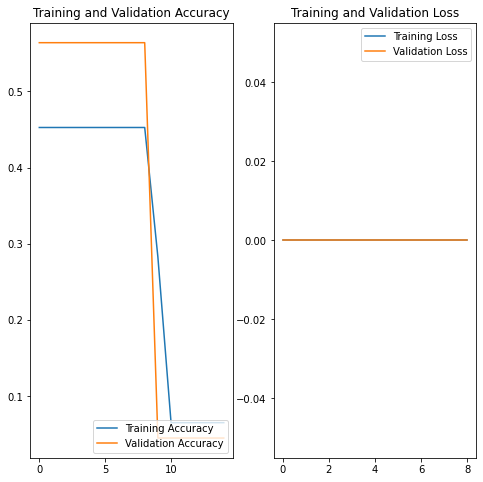

In [ ]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(15)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()


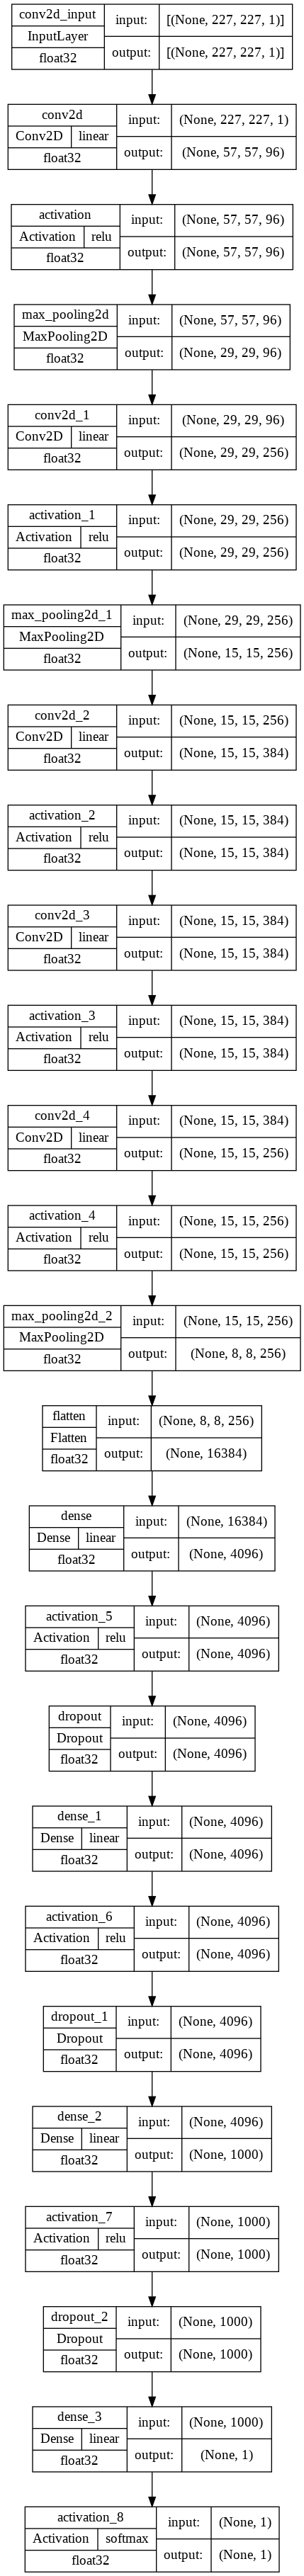

In [ ]:
keras.utils.plot_model(model, to_file='model.png', show_shapes=True, show_dtype=True, show_layer_names=True, rankdir='TB', expand_nested=True, dpi=96, layer_range=None, show_layer_activations=True)